# Training a neuron to compute XOR function

In this section, we would like to train an XOR function with the following truth table:-

|inp1 | inp2 | out |
|-|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

Let us try with single neuron as before.

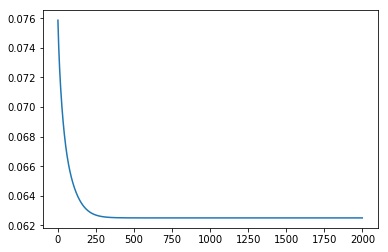

0 0 0.499999998949
0 1 0.499999998949
1 0 0.499999998949
1 1 0.499999998949


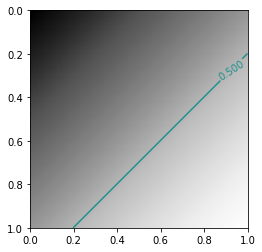

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

inp = [[0, 0], [0, 1], [1, 0], [1, 1]]
outp = [0, 1, 1, 0]

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

errors = []
b = np.random.randn()
w1 = np.random.randn()
w2 = np.random.randn()
for i in range(2000):
    del_b = 0
    del_w1 = 0
    del_w2 = 0
    error = 0
    for i in range(4):
        x1 = inp[i][0]
        x2 = inp[i][1]
        e = outp[i]
        
        a = sigmoid(w1*x1 + w2*x2 + b)
    
        del_w1 += (a-e) * a * (1-a) * x1
        del_w2 += (a-e) * a * (1-a) * x2
        del_b += (a-e) * a * (1-a)
        error += (a-e)**2/2
        
    del_w1 /= 4
    del_w2 /= 4
    del_b /= 4
    error /= 4
    
    w1 -= del_w1
    w2 -= del_w2
    b -= del_b
        
    errors.append(error / 2)
    
plt.plot(errors)
plt.show()
for i1 in [0, 1]:
    for i2 in [0, 1]:
        print i1, i2, sigmoid(w1*x1 + w2*x2 + b)
        

x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)
Z = sigmoid(w1*X1 + w2*X2 + b)
im = plt.imshow(Z, cmap=plt.cm.Greys, extent=(0, 1, 1, 0))
cset = plt.contour(Z, np.array([0.25, 0.5, 0.75]), extent=(0,1,0,1))
plt.clabel(cset)
plt.show()

We can see that the error remains high after many itertions. The partition also looks wrong.

The problem is that an XOR function requires two partitions whereas a single neuron can only perform a single partition.

<img src="http://wantee.github.io/assets/images/posts/xor-5d.png" width="500"/>

This brings us to the next part hidden layers. We can use hidden layers to partition the inputs into more than one regions.

## Hidden layers

A hidden layer is simply a layer in between the input neuron and the output. The output from the previous layer gets fed as an input to the next layer. We introduce a hidden layer consisting of two neurons.

Thus, the new equations are as follows:-

$$a^1_1 = \sigma(w^1_{11}x_1+w^1_{12}x_2+b^1_1)$$

$$a^1_2 = \sigma(w^1_{21}x_1+w^1_{22}x_2+b^1_2)$$

$$a = \sigma(w^2_{11}a^1_1 + w^2_{21}a^1_2 + b^2_1)$$

By repeating the steps in section 1, we can get the following for the final output layer:-

$$\frac{\partial C}{\partial w^2_{11}} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * a^1_1$$

$$\frac{\partial C}{\partial w^2_{21}} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * a^1_2$$

$$\frac{\partial C}{\partial b^2_1} = \frac{1}{n}\Sigma(a-e) * a * (1-a)$$

Getting weights for first hidden layer is a bit tricky but easy to do. We will go through the steps for $w^1_{11}$ and extend it for the rest.

We have from before:-

$$\frac{\partial C}{\partial a^1_1} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * w^2_{11}$$

Activation $a^1_1$ is given by:-

$$a^1_1 = \sigma(z^1_1)$$

$$\frac{d a^1_1}{d z^1_1} = a^1_1(1-a^1_1)$$

The sum is given by:-

$$z^1_1 = w^1_{11}x_1+w^1_{12}x_2+b^1_1$$

$$\frac{\partial z^1_1}{\partial w^1_{11}}=x_1$$

Using chain rule, we get these gradient formulae:-

$$\frac{\partial C}{\partial w^1_{11}} = \frac{1}{n}\Sigma(a-e)*a*(1-a)*w^2_{11}*a^1_1*(1-a^1_1)*x_1$$

$$\frac{\partial C}{\partial w^1_{12}} = \frac{1}{n}\Sigma(a-e)*a*(1-a)*w^2_{11}*a^1_1*(1-a^1_1)*x_2$$

$$\frac{\partial C}{\partial b^1_1} = \frac{1}{n}\Sigma(a-e)*a*(1-a)*w^2_{11}*a^1_1*(1-a^1_1)$$

$$\frac{\partial C}{\partial w^1_{21}} = \frac{1}{n}\Sigma(a-e)*a*(1-a)*w^2_{12}*a^1_2*(1-a^1_2)*x_1$$

$$\frac{\partial C}{\partial w^1_{22}} = \frac{1}{n}\Sigma(a-e)*a*(1-a)*w^2_{22}*a^1_2*(1-a^1_2)*x_2$$

$$\frac{\partial C}{\partial b^1_2} = \frac{1}{n}\Sigma(a-e)*a*(1-a)*w^2_{11}*a^1_2*(1-a^1_2)$$

Phew! That certainly took long. Lets perform gradient descent with the formula!

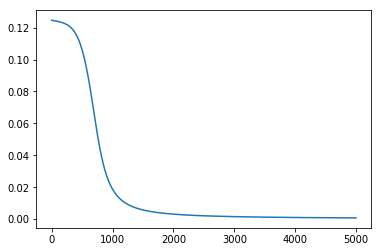

1 1 0 0.0386124599517
1 1 1 0.964121296773
1 1 1 0.956173330294
1 1 0 0.0340405048096


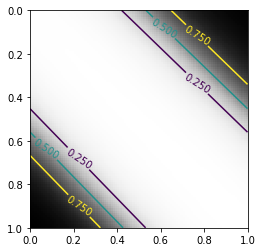

In [32]:
errors = []
w111 = np.random.randn()
w112 = np.random.randn()
w121 = np.random.randn()
w122 = np.random.randn()
b11 = np.random.randn()
b12 = np.random.randn()
w211 = np.random.randn()
w212 = np.random.randn()
b21 = np.random.randn()
for i in range(5000):
    del_w111 = 0
    del_w112 = 0
    del_w121 = 0
    del_w122 = 0
    del_b11 = 0
    del_b12 = 0
    del_w211 = 0
    del_w212 = 0
    del_b21 = 0
    error = 0
    for i in range(4):
        x1 = inp[i][0]
        x2 = inp[i][1]
        e = outp[i]
        
        a11 = sigmoid(w111*x1 + w112*x2 + b11)
        a12 = sigmoid(w121*x1 + w122*x2 + b12)
        a = sigmoid(w211*a11 + w212*a12 + b21)
        error += (0.5 * (a - e)**2)
        del_b21 += (a-e) * a * (1-a)
        del_w211 += a11 * (a-e) * a * (1-a)
        del_w212 += a12 * (a-e) * a * (1-a)
            
        del_b11 += a11 * (1 - a11) * w211 * (a-e) * a * (1-a)
        del_w111 += x1 * a11 * (1 - a11) * w211 * (a-e) * a * (1-a)
        del_w112 += x2 * a11 * (1 - a11) * w211 * (a-e) * a * (1-a)
        
        del_b12 += a12 * (1 - a12) * w212 * (a-e) * a * (1-a)
        del_w121 += x1 * a12 * (1 - a12) * w212 * (a-e) * a * (1-a)
        del_w122 += x2 * a12 * (1 - a12) * w212 * (a-e) * a * (1-a)
    
    w111 -= del_w111/4
    w112 -= del_w112/4
    w121 -= del_w121/4
    w122 -= del_w122/4
    b11 -= del_b11/4
    b12 -= del_b12/4
    w211 -= del_w211/4
    w212 -= del_w212/4
    b21 -= del_b21/4
    errors.append(error / 4)
#print w111, w112, w121, w122, b11, b12, w211, w212, b21
plt.plot(errors)
plt.show()
for i in range(4):
    x1 = inp[i][0]
    x2 = inp[i][1]
    e = outp[i]
    a11 = sigmoid(w111*x1 + w112*x2 + b11)
    a12 = sigmoid(w121*x1 + w122*x2 + b12)
    a = sigmoid(w211*a11 + w212*a12 + b21)
        
    print i1, i2, e, a
    
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)
a11 = sigmoid(w111*X1 + w112*X2 + b11)
a12 = sigmoid(w121*X1 + w122*X2 + b12)
Z = sigmoid(w211*a11 + w212*a12 + b21)
im = plt.imshow(Z, cmap=plt.cm.Greys, extent=(0, 1, 1, 0))
cset = plt.contour(Z, np.array([0.25, 0.5, 0.75]), extent=(0,1,0,1))
plt.clabel(cset)
plt.show()

As can be seen, using a hidden layer lets us create richer partition in the input data.